In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

feature_file = "/content/drive/MyDrive/btc_project/data/processed/btc_feature_data.csv"
df = pd.read_csv(feature_file)

df.head()

,date,close,volume,daily_return,MA7,MA30,RSI,lag_1,lag_3,lag_7,volatility_7,volatility_14
0,2025-01-31 00:00:00,104781.513510,4.212257e+10,0.010244,103422.222449,99902.335988,60.334954,103718.979398,101958.469537,104067.609912,0.014419,0.021692
1,2025-02-01 00:00:00,102382.394097,3.718782e+10,-0.022896,103071.822673,100168.943255,45.805909,104781.513510,101313.112645,104835.192536,0.016588,0.019820
2,2025-02-02 00:00:00,100674.787625,2.282778e+10,-0.016679,102483.072222,100296.364615,41.950670,102382.394097,103718.979398,104796.040777,0.017247,0.020229
3,2025-02-03 00:00:00,97568.316530,5.978423e+10,-0.030856,101771.081906,100279.163740,41.863766,100674.787625,104781.513510,102552.248743,0.018974,0.020390
4,2025-02-04 00:00:00,101466.860666,1.221640e+11,0.039957,101700.852067,100386.167803,49.430987,97568.316530,102382.394097,101958.469537,0.026009,0.023310


In [3]:
# Drop date (not a numeric feature)
X = df.drop(columns=["date", "close"])
y = df["close"]

X.shape, y.shape

((336, 10), (336,))

In [4]:
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (268, 10)
Test size: (68, 10)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

lr_mae, lr_rmse

(147.45453067389613, np.float64(190.51906245320117))

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

rf_mae, rf_rmse

(1291.7211428969113, np.float64(1688.602184447545))

In [8]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

xgb_mae, xgb_rmse

(1638.069779858033, np.float64(2053.6698030000393))

In [9]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [lr_mae, rf_mae, xgb_mae],
    "RMSE": [lr_rmse, rf_rmse, xgb_rmse]
})

results.sort_values("RMSE")

,Model,MAE,RMSE
0,Linear Regression,147.454531,190.519062
1,Random Forest,1291.721143,1688.602184
2,XGBoost,1638.069780,2053.669803


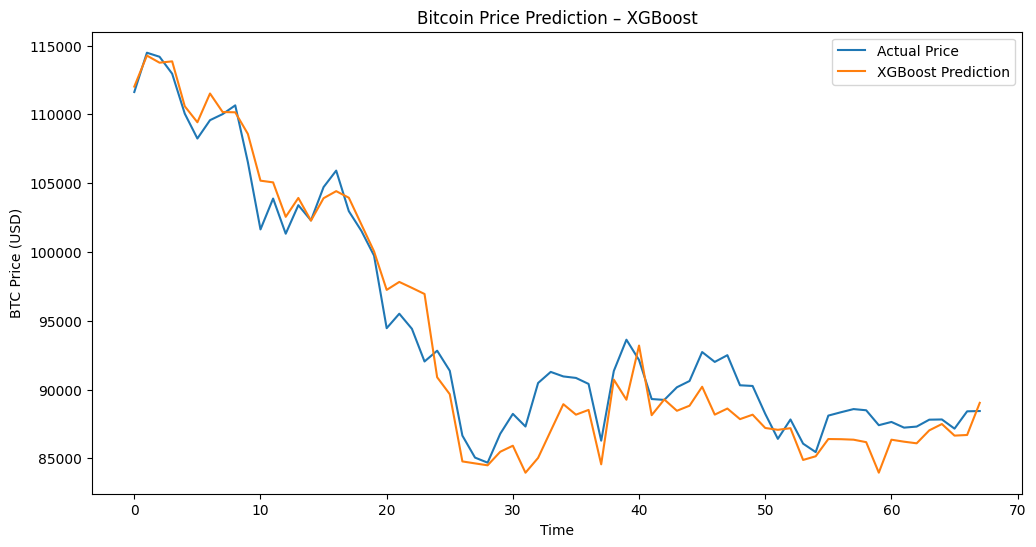

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred_xgb, label="XGBoost Prediction")
plt.title("Bitcoin Price Prediction – XGBoost")
plt.xlabel("Time")
plt.ylabel("BTC Price (USD)")
plt.legend()
plt.show()

In [13]:
import os
import joblib

In [14]:
import joblib

model_path = "/content/drive/MyDrive/btc_project/models"
os.makedirs(model_path, exist_ok=True)

joblib.dump(xgb, f"{model_path}/xgboost_btc_model.pkl")
joblib.dump(scaler, f"{model_path}/scaler.pkl")

print("Model and scaler saved successfully")

Model and scaler saved successfully


In [15]:
app_path = "/content/drive/MyDrive/btc_project/app.py"

with open(app_path, "w") as f:
    f.write("# Streamlit app file\n")

print("app.py created at:", app_path)

app.py created at: /content/drive/MyDrive/btc_project/app.py
